In [2]:
from google.colab import files
uploaded=files.upload()


Saving SuperStore.xlsx to SuperStore.xlsx


[[ 385  162]
 [   9 2443]]
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       547
           1       0.94      1.00      0.97      2452

    accuracy                           0.94      2999
   macro avg       0.96      0.85      0.89      2999
weighted avg       0.94      0.94      0.94      2999



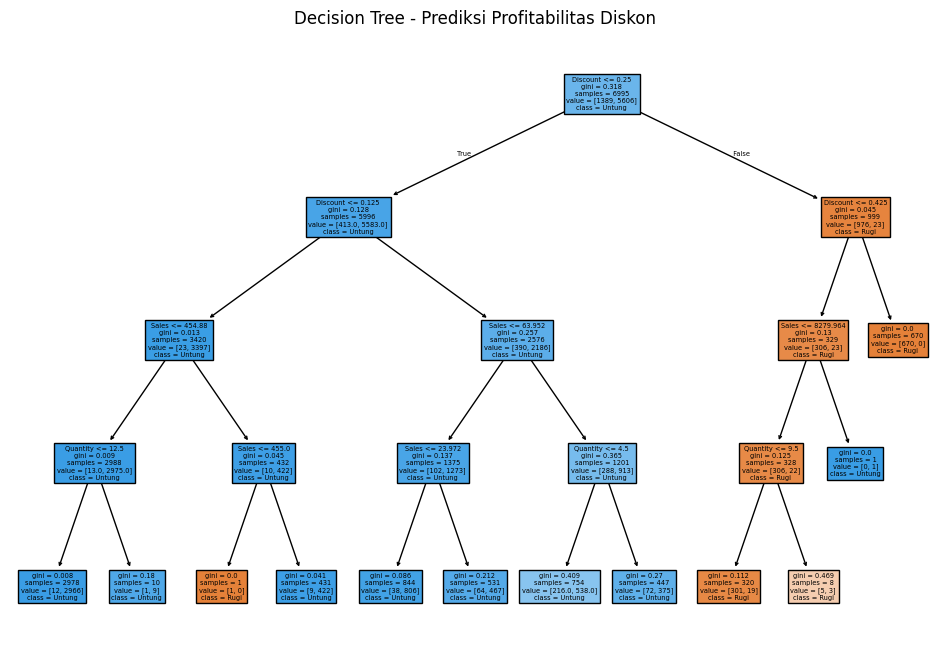

In [5]:
# --- DECISION TREE CLASSIFICATION SUPERSTORE ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_excel("SuperStore.xlsx")

# Tambahkan label apakah profit menguntungkan
df['Profitable'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)

# Pilih fitur yang relevan
features = ['Discount', 'Sales', 'Quantity']
X = df[features]
y = df['Profitable']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=['Rugi', 'Untung'], filled=True)
plt.title('Decision Tree - Prediksi Profitabilitas Diskon')
plt.show()
